# 测试验证彩票预测的模型-1

In [64]:
# 依赖倒入
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [65]:
plt.rcParams['font.sans-serif'] = ['Songti SC']

In [66]:
data = pd.read_csv("../cleaned_data.csv", index_col="date")
data.head()

,first,second,third,fourth,fifth,sixth,seventh
date,,,,,,,
2007-05-30,22,24,29,31,35,4,11
2007-06-02,15,22,31,34,35,5,12
2007-06-04,3,4,18,23,32,1,6
2007-06-06,6,10,16,17,25,2,4
2007-06-09,1,9,19,20,30,2,11


In [67]:
# 获取1号球
first_ball_num = data.loc[:, "first"]

In [68]:
# 数据归一化
first_ball_normal = (first_ball_num - 1)/30

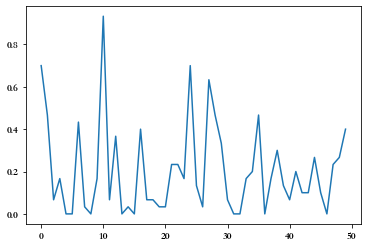

In [69]:
# 1号球前50条数据展示
fig1 = plt.figure()
plt.plot([i for i in range(50)], first_ball_normal[:50])
plt.show()

In [70]:
# 定义数据抽取方法
def data_extract(data, time_step=10):
    x = []
    y = []
    for i in range(len(data) - time_step):
        x.append([a for a in data[i: i + time_step]])
        y.append(data[i+time_step])
    x = np.array(x).reshape(len(x), len(x[0]), features)
    y = np.array(y).reshape(len(y), 1)
    return x,y

In [71]:
# 将数据拆分两部分（训练集和测试集）
features = 1
time_step = 10
train_data = first_ball_normal.iloc[:(len(first_ball_normal)-400)]
test_data = first_ball_normal.iloc[(len(first_ball_normal)-400):]

In [72]:
# 抽取数据
x_train, y_train = data_extract(train_data, time_step)
x_test, y_test = data_extract(test_data, time_step)

In [73]:
# 建立LSTM模型
model = Sequential()
model.add(LSTM(units=40, input_shape=(10, 1), activation="relu"))
model.add(Dense(units=1, activation="linear"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 40)                6720      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 41        
Total params: 6,761
Trainable params: 6,761
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mse"])

In [80]:
model.fit(x_train, y_train, batch_size=64, epochs=2000)

Epoch 1/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0074 - mse: 0.0074
Epoch 2/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0075 - mse: 0.0075
Epoch 3/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0073 - mse: 0.0073
Epoch 4/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0073 - mse: 0.0073
Epoch 5/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0072 - mse: 0.0072
Epoch 6/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0076 - mse: 0.0076
Epoch 7/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0073 - mse: 0.0073
Epoch 8/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0072 - mse: 0.0072
Epoch 9/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0074 - mse: 0.0074
Epoch 10/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0074 - mse: 0.0074
Epoch 11/2000
27/27 [============================

27/27 [==============================] - 0s 3ms/step - loss: 0.0068 - mse: 0.0068
Epoch 87/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0068 - mse: 0.0068
Epoch 88/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0069 - mse: 0.0069
Epoch 89/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0068 - mse: 0.0068
Epoch 90/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0074 - mse: 0.0074
Epoch 91/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0072 - mse: 0.0072
Epoch 92/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0072 - mse: 0.0072
Epoch 93/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0067 - mse: 0.0067
Epoch 94/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0069 - mse: 0.0069
Epoch 95/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0067 - mse: 0.0067
Epoch 96/2000
27/27 [==============================] -

27/27 [==============================] - 0s 3ms/step - loss: 0.0069 - mse: 0.0069
Epoch 171/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0065 - mse: 0.0065
Epoch 172/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0074 - mse: 0.0074
Epoch 173/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0086 - mse: 0.0086
Epoch 174/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0066 - mse: 0.0066
Epoch 175/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0070 - mse: 0.0070
Epoch 176/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0075 - mse: 0.0075
Epoch 177/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0066 - mse: 0.0066
Epoch 178/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0063 - mse: 0.0063
Epoch 179/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0063 - mse: 0.0063
Epoch 180/2000
27/27 [=======================

27/27 [==============================] - 0s 3ms/step - loss: 0.0071 - mse: 0.0071
Epoch 255/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0066 - mse: 0.0066
Epoch 256/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0066 - mse: 0.0066
Epoch 257/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0059 - mse: 0.0059
Epoch 258/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0058 - mse: 0.0058
Epoch 259/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0060 - mse: 0.0060
Epoch 260/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0061 - mse: 0.0061
Epoch 261/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0057 - mse: 0.0057
Epoch 262/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0057 - mse: 0.0057
Epoch 263/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0059 - mse: 0.0059
Epoch 264/2000
27/27 [=======================

27/27 [==============================] - 0s 3ms/step - loss: 0.0057 - mse: 0.0057
Epoch 339/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0060 - mse: 0.0060
Epoch 340/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0058 - mse: 0.0058
Epoch 341/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0057 - mse: 0.0057
Epoch 342/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0058 - mse: 0.0058
Epoch 343/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0059 - mse: 0.0059
Epoch 344/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0064 - mse: 0.0064
Epoch 345/2000
27/27 [==============================] - 0s 4ms/step - loss: 0.0057 - mse: 0.0057
Epoch 346/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0056 - mse: 0.0056
Epoch 347/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0059 - mse: 0.0059
Epoch 348/2000
27/27 [=======================

27/27 [==============================] - 0s 3ms/step - loss: 0.0055 - mse: 0.0055
Epoch 423/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0055 - mse: 0.0055
Epoch 424/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0060 - mse: 0.0060
Epoch 425/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0056 - mse: 0.0056
Epoch 426/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0056 - mse: 0.0056
Epoch 427/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0056 - mse: 0.0056
Epoch 428/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0062 - mse: 0.0062
Epoch 429/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0054 - mse: 0.0054
Epoch 430/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0052 - mse: 0.0052
Epoch 431/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0053 - mse: 0.0053
Epoch 432/2000
27/27 [=======================

27/27 [==============================] - 0s 3ms/step - loss: 0.0051 - mse: 0.0051
Epoch 507/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0050 - mse: 0.0050
Epoch 508/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0047 - mse: 0.0047
Epoch 509/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0048 - mse: 0.0048
Epoch 510/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0050 - mse: 0.0050
Epoch 511/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0052 - mse: 0.0052
Epoch 512/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0049 - mse: 0.0049
Epoch 513/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0050 - mse: 0.0050
Epoch 514/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0048 - mse: 0.0048
Epoch 515/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0050 - mse: 0.0050
Epoch 516/2000
27/27 [=======================

27/27 [==============================] - 0s 3ms/step - loss: 0.0046 - mse: 0.0046
Epoch 591/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0047 - mse: 0.0047
Epoch 592/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0049 - mse: 0.0049
Epoch 593/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0050 - mse: 0.0050
Epoch 594/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0046 - mse: 0.0046
Epoch 595/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0045 - mse: 0.0045
Epoch 596/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0045 - mse: 0.0045
Epoch 597/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0044 - mse: 0.0044
Epoch 598/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0045 - mse: 0.0045
Epoch 599/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0049 - mse: 0.0049
Epoch 600/2000
27/27 [=======================

27/27 [==============================] - 0s 3ms/step - loss: 0.0044 - mse: 0.0044
Epoch 675/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0050 - mse: 0.0050
Epoch 676/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0057 - mse: 0.0057
Epoch 677/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0052 - mse: 0.0052
Epoch 678/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0049 - mse: 0.0049
Epoch 679/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0045 - mse: 0.0045
Epoch 680/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0042 - mse: 0.0042
Epoch 681/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0042 - mse: 0.0042
Epoch 682/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0045 - mse: 0.0045
Epoch 683/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0048 - mse: 0.0048
Epoch 684/2000
27/27 [=======================

27/27 [==============================] - 0s 3ms/step - loss: 0.0042 - mse: 0.0042
Epoch 759/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0044 - mse: 0.0044
Epoch 760/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0041 - mse: 0.0041
Epoch 761/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0048 - mse: 0.0048
Epoch 762/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0043 - mse: 0.0043
Epoch 763/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0042 - mse: 0.0042
Epoch 764/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0042 - mse: 0.0042
Epoch 765/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0046 - mse: 0.0046
Epoch 766/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0053 - mse: 0.0053
Epoch 767/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0044 - mse: 0.0044
Epoch 768/2000
27/27 [=======================

27/27 [==============================] - 0s 3ms/step - loss: 0.0041 - mse: 0.0041
Epoch 843/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0046 - mse: 0.0046
Epoch 844/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0039 - mse: 0.0039
Epoch 845/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0038 - mse: 0.0038
Epoch 846/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0040 - mse: 0.0040
Epoch 847/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0044 - mse: 0.0044
Epoch 848/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0046 - mse: 0.0046
Epoch 849/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0051 - mse: 0.0051
Epoch 850/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0049 - mse: 0.0049
Epoch 851/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0039 - mse: 0.0039
Epoch 852/2000
27/27 [=======================

27/27 [==============================] - 0s 3ms/step - loss: 0.0038 - mse: 0.0038
Epoch 927/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0039 - mse: 0.0039
Epoch 928/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0041 - mse: 0.0041
Epoch 929/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0040 - mse: 0.0040
Epoch 930/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0038 - mse: 0.0038
Epoch 931/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0046 - mse: 0.0046
Epoch 932/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0045 - mse: 0.0045
Epoch 933/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0040 - mse: 0.0040
Epoch 934/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0039 - mse: 0.0039
Epoch 935/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0038 - mse: 0.0038
Epoch 936/2000
27/27 [=======================

27/27 [==============================] - 0s 4ms/step - loss: 0.0038 - mse: 0.0038
Epoch 1011/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0034 - mse: 0.0034
Epoch 1012/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0041 - mse: 0.0041
Epoch 1013/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0041 - mse: 0.0041
Epoch 1014/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0042 - mse: 0.0042
Epoch 1015/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0040 - mse: 0.0040
Epoch 1016/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0037 - mse: 0.0037
Epoch 1017/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0039 - mse: 0.0039
Epoch 1018/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0036 - mse: 0.0036
Epoch 1019/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0037 - mse: 0.0037
Epoch 1020/2000
27/27 [=============

27/27 [==============================] - 0s 3ms/step - loss: 0.0041 - mse: 0.0041
Epoch 1094/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0040 - mse: 0.0040
Epoch 1095/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0043 - mse: 0.0043
Epoch 1096/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0041 - mse: 0.0041
Epoch 1097/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0051 - mse: 0.0051
Epoch 1098/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0043 - mse: 0.0043
Epoch 1099/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0041 - mse: 0.0041
Epoch 1100/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0037 - mse: 0.0037
Epoch 1101/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0033 - mse: 0.0033
Epoch 1102/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0038 - mse: 0.0038
Epoch 1103/2000
27/27 [=============

27/27 [==============================] - 0s 3ms/step - loss: 0.0034 - mse: 0.0034
Epoch 1177/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0034 - mse: 0.0034
Epoch 1178/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0032 - mse: 0.0032
Epoch 1179/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0034 - mse: 0.0034
Epoch 1180/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0036 - mse: 0.0036
Epoch 1181/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0039 - mse: 0.0039
Epoch 1182/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0040 - mse: 0.0040
Epoch 1183/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0040 - mse: 0.0040
Epoch 1184/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0034 - mse: 0.0034
Epoch 1185/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0034 - mse: 0.0034
Epoch 1186/2000
27/27 [=============

27/27 [==============================] - 0s 3ms/step - loss: 0.0031 - mse: 0.0031
Epoch 1260/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0031 - mse: 0.0031
Epoch 1261/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0036 - mse: 0.0036
Epoch 1262/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0040 - mse: 0.0040
Epoch 1263/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0032 - mse: 0.0032
Epoch 1264/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0031 - mse: 0.0031
Epoch 1265/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0033 - mse: 0.0033
Epoch 1266/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0034 - mse: 0.0034
Epoch 1267/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0035 - mse: 0.0035
Epoch 1268/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0034 - mse: 0.0034
Epoch 1269/2000
27/27 [=============

27/27 [==============================] - 0s 3ms/step - loss: 0.0030 - mse: 0.0030
Epoch 1343/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0031 - mse: 0.0031
Epoch 1344/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0034 - mse: 0.0034
Epoch 1345/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0037 - mse: 0.0037
Epoch 1346/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0030 - mse: 0.0030
Epoch 1347/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0033 - mse: 0.0033
Epoch 1348/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0030 - mse: 0.0030
Epoch 1349/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0034 - mse: 0.0034
Epoch 1350/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0044 - mse: 0.0044
Epoch 1351/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0034 - mse: 0.0034
Epoch 1352/2000
27/27 [=============

27/27 [==============================] - 0s 3ms/step - loss: 0.0037 - mse: 0.0037
Epoch 1426/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0032 - mse: 0.0032
Epoch 1427/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0034 - mse: 0.0034
Epoch 1428/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0034 - mse: 0.0034
Epoch 1429/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0030 - mse: 0.0030
Epoch 1430/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0030 - mse: 0.0030
Epoch 1431/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0029 - mse: 0.0029
Epoch 1432/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0031 - mse: 0.0031
Epoch 1433/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0030 - mse: 0.0030
Epoch 1434/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0027 - mse: 0.0027
Epoch 1435/2000
27/27 [=============

27/27 [==============================] - 0s 4ms/step - loss: 0.0028 - mse: 0.0028
Epoch 1509/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0031 - mse: 0.0031
Epoch 1510/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0027 - mse: 0.0027
Epoch 1511/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0030 - mse: 0.0030
Epoch 1512/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0030 - mse: 0.0030
Epoch 1513/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0028 - mse: 0.0028
Epoch 1514/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0030 - mse: 0.0030
Epoch 1515/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0028 - mse: 0.0028
Epoch 1516/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0028 - mse: 0.0028
Epoch 1517/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0027 - mse: 0.0027
Epoch 1518/2000
27/27 [=============

27/27 [==============================] - 0s 3ms/step - loss: 0.0030 - mse: 0.0030
Epoch 1592/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0031 - mse: 0.0031
Epoch 1593/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0027 - mse: 0.0027
Epoch 1594/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0027 - mse: 0.0027
Epoch 1595/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0028 - mse: 0.0028
Epoch 1596/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0030 - mse: 0.0030
Epoch 1597/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0029 - mse: 0.0029
Epoch 1598/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0027 - mse: 0.0027
Epoch 1599/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0026 - mse: 0.0026
Epoch 1600/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0026 - mse: 0.0026
Epoch 1601/2000
27/27 [=============

27/27 [==============================] - 0s 3ms/step - loss: 0.0030 - mse: 0.0030
Epoch 1675/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0036 - mse: 0.0036
Epoch 1676/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0032 - mse: 0.0032
Epoch 1677/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0029 - mse: 0.0029
Epoch 1678/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0026 - mse: 0.0026
Epoch 1679/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0031 - mse: 0.0031
Epoch 1680/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0030 - mse: 0.0030
Epoch 1681/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0028 - mse: 0.0028
Epoch 1682/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0026 - mse: 0.0026
Epoch 1683/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0027 - mse: 0.0027
Epoch 1684/2000
27/27 [=============

27/27 [==============================] - 0s 3ms/step - loss: 0.0024 - mse: 0.0024
Epoch 1758/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0025 - mse: 0.0025
Epoch 1759/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0026 - mse: 0.0026
Epoch 1760/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0026 - mse: 0.0026
Epoch 1761/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0033 - mse: 0.0033
Epoch 1762/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0033 - mse: 0.0033
Epoch 1763/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0032 - mse: 0.0032
Epoch 1764/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0028 - mse: 0.0028
Epoch 1765/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0025 - mse: 0.0025
Epoch 1766/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0024 - mse: 0.0024
Epoch 1767/2000
27/27 [=============

27/27 [==============================] - 0s 3ms/step - loss: 0.0024 - mse: 0.0024
Epoch 1841/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0024 - mse: 0.0024
Epoch 1842/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0029 - mse: 0.0029
Epoch 1843/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0031 - mse: 0.0031
Epoch 1844/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0028 - mse: 0.0028
Epoch 1845/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0027 - mse: 0.0027
Epoch 1846/2000
27/27 [==============================] - 0s 4ms/step - loss: 0.0026 - mse: 0.0026
Epoch 1847/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0027 - mse: 0.0027
Epoch 1848/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0025 - mse: 0.0025
Epoch 1849/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0025 - mse: 0.0025
Epoch 1850/2000
27/27 [=============

27/27 [==============================] - 0s 3ms/step - loss: 0.0022 - mse: 0.0022
Epoch 1924/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0020 - mse: 0.0020
Epoch 1925/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023
Epoch 1926/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0022 - mse: 0.0022
Epoch 1927/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0025 - mse: 0.0025
Epoch 1928/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0025 - mse: 0.0025
Epoch 1929/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0026 - mse: 0.0026
Epoch 1930/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0024 - mse: 0.0024
Epoch 1931/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0024 - mse: 0.0024
Epoch 1932/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0020 - mse: 0.0020
Epoch 1933/2000
27/27 [=============

In [82]:
y_train_predict = model.predict(x_train)

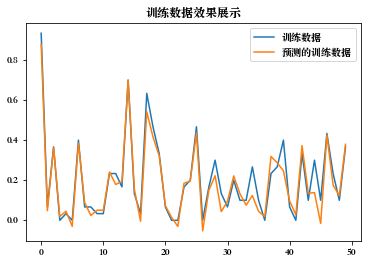

In [83]:
# 训练数据效果展示
fig2 = plt.figure()
plt.plot(y_train[:50], label="训练数据")
plt.plot(y_train_predict[:50], label="预测的训练数据")
plt.title("训练数据效果展示")
plt.legend()
plt.show()

In [84]:
y_test_predict = model.predict(x_test)

/Users/mac/workspaces/lottery_predict_venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mac/workspaces/lottery_predict_venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


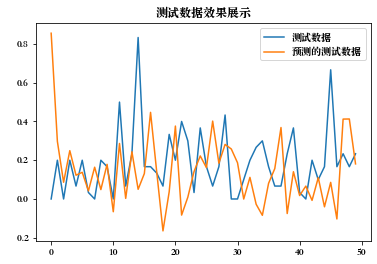

In [85]:
# 测试数据效果展示
fig3 = plt.figure()
plt.plot(y_test[:50], label="测试数据")
plt.plot(y_test_predict[:50], label="预测的测试数据")
plt.title("测试数据效果展示")
plt.legend()
plt.show()